# Setup

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from glob import glob  # for getting filepaths

# for text processing
import os
import re
import spacy
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# for machine learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer 
from sklearn.model_selection import train_test_split

In [34]:
# Download necessary NLTK data
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chanho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chanho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chanho\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [3]:
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# Read in the data

In [6]:
dataset_path = 'hate_speech_dataset/labeled_data.csv'
df = pd.read_csv(dataset_path)

In [7]:
# Preview the dataset
df.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


## Preview Data

In [21]:
# identify the 3 uniqe classes
df['class'].value_counts()


class
1    19190
2     4163
0     1430
Name: count, dtype: int64

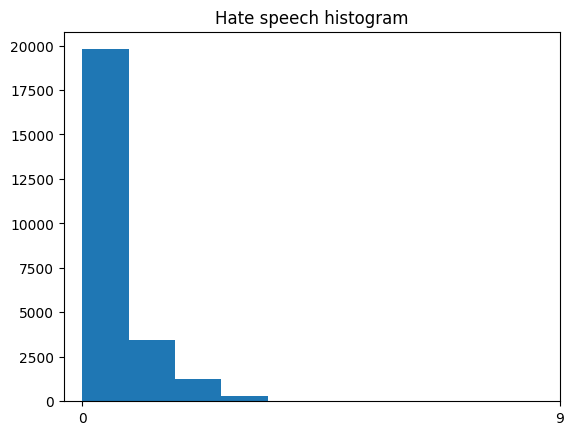

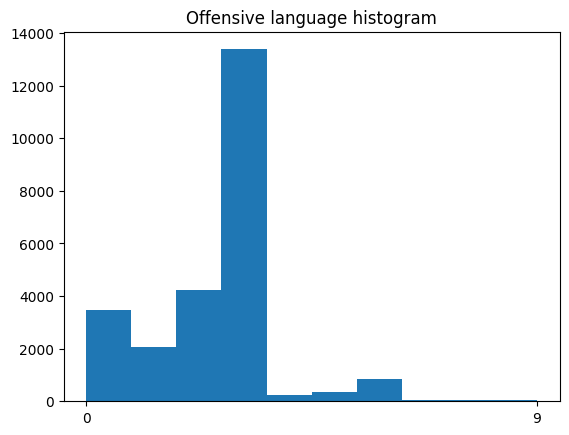

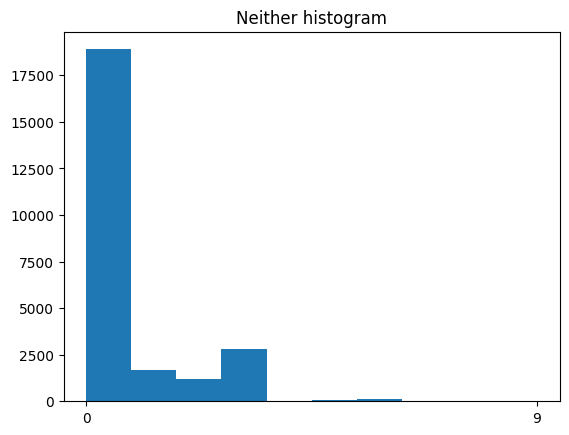

In [26]:
# Plot the distribution of each classes
plt.hist(df['hate_speech'], bins = 8)
plt.title('Hate speech histogram')
plt.xticks([0,9], [0,9])
plt.show()

plt.hist(df['offensive_language'], bins = 10)
plt.title('Offensive language histogram')
plt.xticks([0,9], [0,9])
plt.show()

plt.hist(df['neither'], bins = 10)
plt.title('Neither histogram')
plt.xticks([0,9], [0,9])
plt.show()

# Preprocess Data

In [8]:
# Create two new dataset from 'tweet' and 'class' column
tweet_X = pd.DataFrame(df['tweet'])
tweet_y = pd.DataFrame(df['class'])

Class 0 is hate speech, 
class 1 is offensive language, 
class 2 is neither

## Simple Text Preprocessing

Lowercase the tweet, URLs, HTML entities, hashtags and mentions, punctuation, extra whitespace

In [9]:
def preprocess_tweet_typeB(tweet):
    # Lowercase the tweet
    tweet = tweet.lower()
    
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    
    # Remove HTML entities
    tweet = re.sub(r'&\w+;', '', tweet)
    
    # Remove hashtags and mentions
    tweet = re.sub(r'#\w+|@\w+', '', tweet)
    
    # Remove punctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespace
    tweet = tweet.strip()
    tweet = re.sub(r'\s+', ' ', tweet)
    
    return tweet

# Apply the preprocessing function to the X_train dataset
tweet_X_cleanedB = tweet_X['tweet'].apply(preprocess_tweet_typeB)

# Display the first few cleaned tweet
tweet_X_cleanedB.head()

0    rt as a woman you shouldnt complain about clea...
1    rt boy dats coldtyga dwn bad for cuffin dat ho...
2    rt dawg rt you ever fuck a bitch and she start...
3                            rt she look like a tranny
4    rt the shit you hear about me might be true or...
Name: tweet, dtype: object

## Advanced Text Preprocessing

Additional Tokenization, remove Stopwords, and Lemmatization steps


In [ ]:
# Install the spaCy library
!python -m spacy download en_core_web_sm

In [35]:
nlp = spacy.load("en_core_web_sm")

# Define stopwords
stop_words = set(stopwords.words("english"))

def preprocess_tweet_typeA(tweet):
    # Lowercase the tweet
    tweet = tweet.lower()
    
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    
    # Remove HTML entities
    tweet = re.sub(r'&\w+;', '', tweet)
    
    # Remove hashtags and mentions
    tweet = re.sub(r'#\w+|@\w+', '', tweet)
    
    # Remove punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)
    
    # Remove extra whitespace
    tweet = tweet.strip()
    tweet = re.sub(r'\s+', ' ', tweet)
    
    # Tokenize the tweet
    tokens = word_tokenize(tweet)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize the tokens
    doc = nlp(" ".join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]
    
    return " ".join(lemmatized_tokens)

# Apply the preprocessing function to the tweet_X dataset
tweet_X_cleanedA = tweet_X['tweet'].apply(preprocess_tweet_typeA)

# Display the first few cleaned tweets
tweet_X_cleanedA.head(15)

0     rt woman should not complain clean house man a...
1     rt boy dat coldtyga dwn bad cuffin dat hoe 1st...
2     rt dawg rt ever fuck bitch start cry confuse shit
3                                   rt look like tranny
4     rt shit hear might true might faker bitch tell ya
5     shit blow meclaim faithful somebody still fuck...
6               sit hate another bitch get much shit go
7         cause I m tired big bitch come we skinny girl
8                        might get ya bitch back that s
9                      hobby include fight mariam bitch
10    keeks bitch curve everyone lol walk conversati...
11                           murda gang bitch gang land
12                            hoe smoke loser yea go ig
13                                 bad bitch thing like
14                                            bitch get
Name: tweet, dtype: object

# Entity Detection

In [36]:
# take a 20% sample of the 'tweet_X_cleanedB' data
tweet_sample = tweet_X_cleanedB.sample(frac=0.2, random_state=42)

nlp = spacy.load('en_core_web_sm')

#let's get the named entities:
doc = [nlp(sentence) for sentence in tweet_sample]
for i in doc:
    for ent in i.ents:
        if ent.label_ == 'PERSON':
            print(ent.text, ent.label_ )

ho PERSON
imo this conductor PERSON
rt i kno PERSON
halloweens over PERSON
kris ok PERSON
omar johnson PERSON
somethingod throwin PERSON
dick bitch PERSON
ewww yuck PERSON
imik PERSON
shylock PERSON
ya bitch PERSON
rt hun PERSON
ya bitch PERSON
weet van gekkigheid PERSON
charlie sheen PERSON
rt dese PERSON
nigga PERSON
rt miss PERSON
ya PERSON
lol avila PERSON
ymas sws PERSON
rt jackie PERSON
lmaoooo PERSON
rt trey songz reply PERSON
nicki minaj PERSON
linda PERSON
kod PERSON
rt jihadi PERSON
rt yung PERSON
lebron PERSON
nooo ambers PERSON
knowww righttt PERSON
lmfaoooooooooooooooooo PERSON
charlie PERSON
jim PERSON
kevin hart PERSON
mary jane PERSON
peter PERSON
lee castro PERSON
anthony PERSON
tansformers4 PERSON
michael bay PERSON
rt obama PERSON
ali PERSON
rt obama PERSON
johnson PERSON
lmao rt lmao rt PERSON
rt joan PERSON
ron brownvin PERSON
rt tom ford PERSON
tegenwoordig weet PERSON
al niet PERSON
anthony davis PERSON
rt johnny PERSON
mike PERSON
ya tried PERSON
miley PERSON
ko

**`Obseravation`**: output of the entity detection code you provided shows that the spaCy model is identifying many words as PERSON entities that do not logically make sense as names of people.

Probable cause:
- Tweet data contains slang, abbreviations, or other informal language that the model is not trained to handle well
- The `en_core_web_sm` model is a small model and might not be as accurate as larger models.
- It requires further preprocessing, including removing noise, correcting spelling, and normalizing text without slang and other informal language, but this would not be suitable for Hate speech detection.

# Split Dataset

In [37]:
# Advanced Preprocessing
XA_train, XA_test, yA_train, yA_test = train_test_split(tweet_X_cleanedA, tweet_y, 
                                                    test_size=0.2,
                                                    stratify=tweet_y,
                                                    random_state=42)
print(XA_train.head(5))
print(XA_test.head(5))

21283                     talk angela hoe
12619    lol tricking nicca leave n right
975                    bitch get stuff do
2481                   bitch get flameeee
7263                     good bitch choke
Name: tweet, dtype: object
15814    rt gift shop 911 museum charge admission mass ...
3158        need red green yellow pant helly shirt express
24587    onert hoe do not wantin ya nigga want ya happi...
360                            turn yo bitch eaterrrrrrrrr
16123    rt smh u get ebola rt stick foot feel freshnes...
Name: tweet, dtype: object


In [38]:
# Simple Preprocessing
XB_train, XB_test, yB_train, yB_test = train_test_split(tweet_X_cleanedB, tweet_y, 
                                                    test_size=0.2,
                                                    stratify=tweet_y,
                                                    random_state=42)
print(XB_train.head(5))
print(XB_test.head(5))

21283                  talking angela is a hoe
12619    lol they tricking niccas left n right
975                     bitches get stuff done
2481                  bitch i got the flameeee
7263                          good bitch choke
Name: tweet, dtype: object
15814    rt there is a gift shop at the 911 museum and ...
3158     i need some red green yellow pants helly shirt...
24587    this the onert hoes dont be wantin ya nigga th...
360               i can turn yo bitch into a eaterrrrrrrrr
16123    rt smh u got ebola now rt i stick my foot out ...
Name: tweet, dtype: object


# Train a Supervised Classifier

In [39]:
# Import Models and Metrics
from sklearn.naive_bayes import MultinomialNB        # Multinomial Naive Bayes model classifier model
from sklearn.linear_model import LogisticRegression  # Logistic Regression model classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest model classifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### MultinomialNB Model

In [40]:
# simple preprocessing
vectorizer = CountVectorizer() # Convert text data to numerical features
XB_train_vect = vectorizer.fit_transform(XB_train)
XB_test_vect = vectorizer.transform(XB_test)

model = MultinomialNB()
model.fit(XB_train_vect, yB_train) # Fit model to the Training Data

y_pred = model.predict(XB_test_vect) 

print(f"Bccuracy : {accuracy_score(yB_test, y_pred)}")
print(classification_report(yB_test, y_pred))

Bccuracy : 0.8575751462578173
              precision    recall  f1-score   support

           0       0.33      0.02      0.04       286
           1       0.86      0.98      0.92      3838
           2       0.85      0.57      0.68       833

    accuracy                           0.86      4957
   macro avg       0.68      0.52      0.55      4957
weighted avg       0.83      0.86      0.83      4957



c:\Users\chanho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
# Advanced Preprocessing
vectorizer = CountVectorizer() # Convert text data to numerical features
XA_train_vect = vectorizer.fit_transform(XA_train)
XA_test_vect = vectorizer.transform(XA_test)

model = MultinomialNB() # Initialize the MultinomialNB model without class_weight
model.fit(XA_train_vect, yA_train) # Fit model to the Training Data

y_pred = model.predict(XA_test_vect) 

print(f"Accuracy : {accuracy_score(yA_test, y_pred)}")
print(classification_report(yA_test, y_pred))

Accuracy : 0.8620133145047407
              precision    recall  f1-score   support

           0       0.40      0.03      0.06       286
           1       0.87      0.98      0.92      3838
           2       0.85      0.60      0.70       833

    accuracy                           0.86      4957
   macro avg       0.71      0.54      0.56      4957
weighted avg       0.84      0.86      0.83      4957



c:\Users\chanho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Logistic Regression

In [53]:
# Simple Preprocessing
vectorizer = CountVectorizer() # Convert text data to numerical features
XB_train_vect = vectorizer.fit_transform(XB_train)
XB_test_vect = vectorizer.transform(XB_test)

model = LogisticRegression(multi_class='ovr', solver='liblinear', class_weight='balanced')
model.fit(XB_train_vect, yB_train) # Fit model to the Training Data

yB_pred_LR = model.predict(XB_test_vect) 

print(f"Accuracy : {accuracy_score(yB_test, yB_pred_LR)}")
print(classification_report(yB_test, yB_pred_LR))

c:\Users\chanho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\chanho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy : 0.8876336493847085
              precision    recall  f1-score   support

           0       0.42      0.47      0.44       286
           1       0.95      0.91      0.93      3838
           2       0.80      0.93      0.86       833

    accuracy                           0.89      4957
   macro avg       0.72      0.77      0.74      4957
weighted avg       0.90      0.89      0.89      4957



In [54]:
# Advanced Preprocessing
vectorizer = CountVectorizer() # Convert text data to numerical features
XA_train_vect = vectorizer.fit_transform(XA_train)
XA_test_vect = vectorizer.transform(XA_test)

model = LogisticRegression(multi_class='ovr', solver='liblinear', class_weight='balanced')
model.fit(XA_train_vect, yA_train) # Fit model to the Training Data

yA_pred_LR = model.predict(XA_test_vect) 

print(f"Accuracy : {accuracy_score(yA_test, yA_pred_LR)}")
print(classification_report(yA_test, yA_pred_LR))

c:\Users\chanho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\chanho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy : 0.8880371192253379
              precision    recall  f1-score   support

           0       0.42      0.47      0.44       286
           1       0.95      0.91      0.93      3838
           2       0.79      0.92      0.85       833

    accuracy                           0.89      4957
   macro avg       0.72      0.77      0.74      4957
weighted avg       0.90      0.89      0.89      4957



### Random Forest

In [55]:
# Simple Preprocessing
vectorizer = CountVectorizer() # Convert text data to numerical features
XB_train_vect = vectorizer.fit_transform(XB_train)
XB_test_vect = vectorizer.transform(XB_test)

model = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               class_weight='balanced')
model.fit(XB_train_vect, yB_train) # Fit model to the Training Data

yB_pred_RF = model.predict(XB_test_vect) 

print(f"Accuracy : {accuracy_score(yB_test, yB_pred_RF)}")
print(classification_report(yB_test, yB_pred_RF))

c:\Users\chanho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy : 0.8628202541859996
              precision    recall  f1-score   support

           0       0.36      0.14      0.20       286
           1       0.87      0.97      0.92      3838
           2       0.88      0.61      0.72       833

    accuracy                           0.86      4957
   macro avg       0.70      0.57      0.61      4957
weighted avg       0.84      0.86      0.84      4957



In [56]:
# Advanced Preprocessing
vectorizer = CountVectorizer() # Convert text data to numerical features
XA_train_vect = vectorizer.fit_transform(XA_train)
XA_test_vect = vectorizer.transform(XA_test)

model = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               class_weight='balanced')
model.fit(XA_train_vect, yA_train) # Fit model to the Training Data

yA_pred_RF = model.predict(XA_test_vect) 

print(f"Accuracy : {accuracy_score(yA_test, yA_pred_RF)}")
print(classification_report(yA_test, yA_pred_RF))

c:\Users\chanho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy : 0.8793625176518055
              precision    recall  f1-score   support

           0       0.34      0.23      0.28       286
           1       0.91      0.95      0.93      3838
           2       0.84      0.77      0.80       833

    accuracy                           0.88      4957
   macro avg       0.70      0.65      0.67      4957
weighted avg       0.87      0.88      0.87      4957



# Plot Results

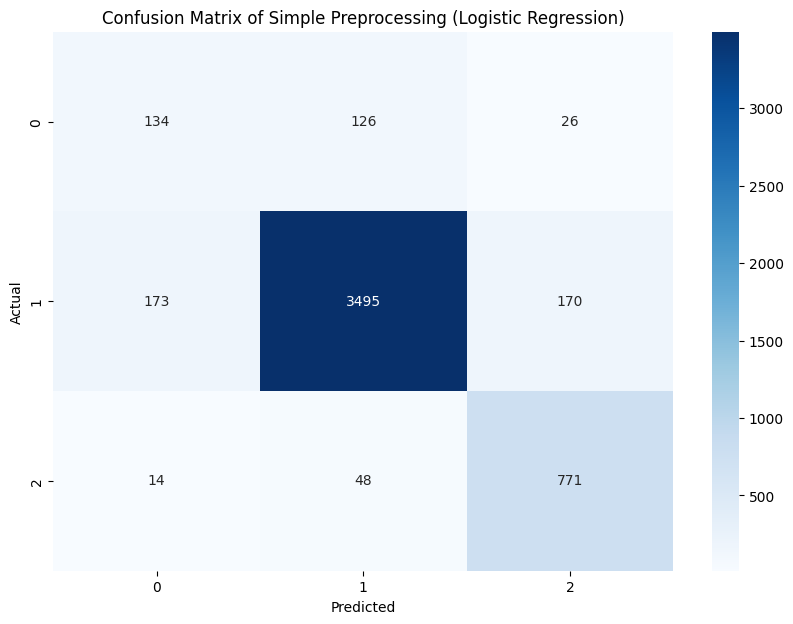

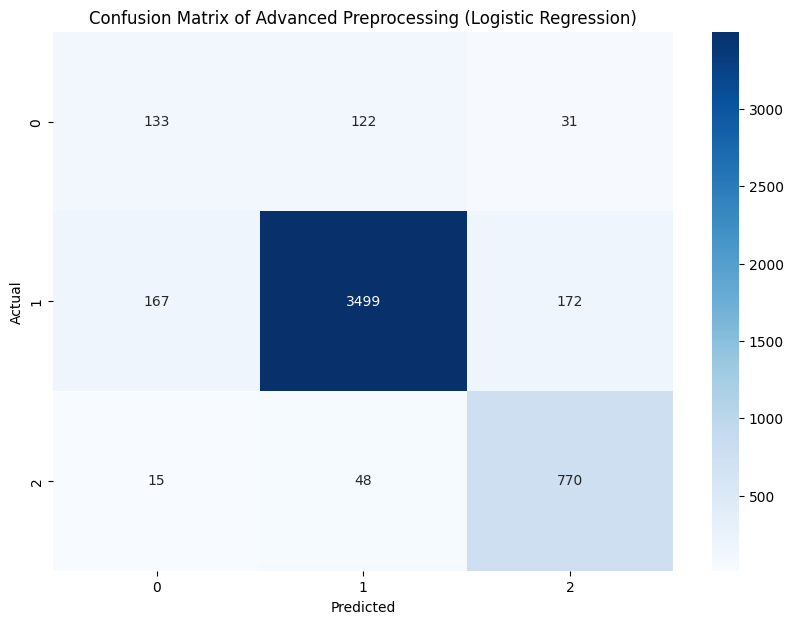

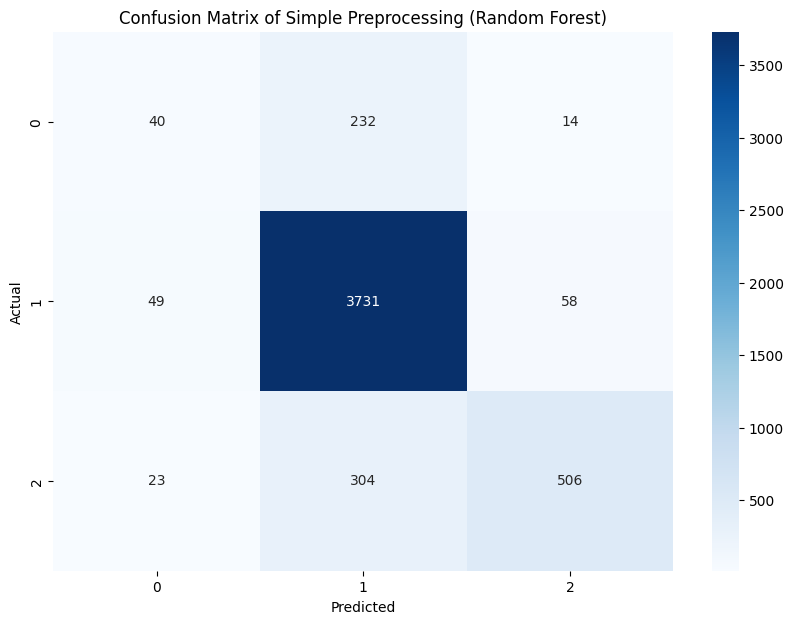

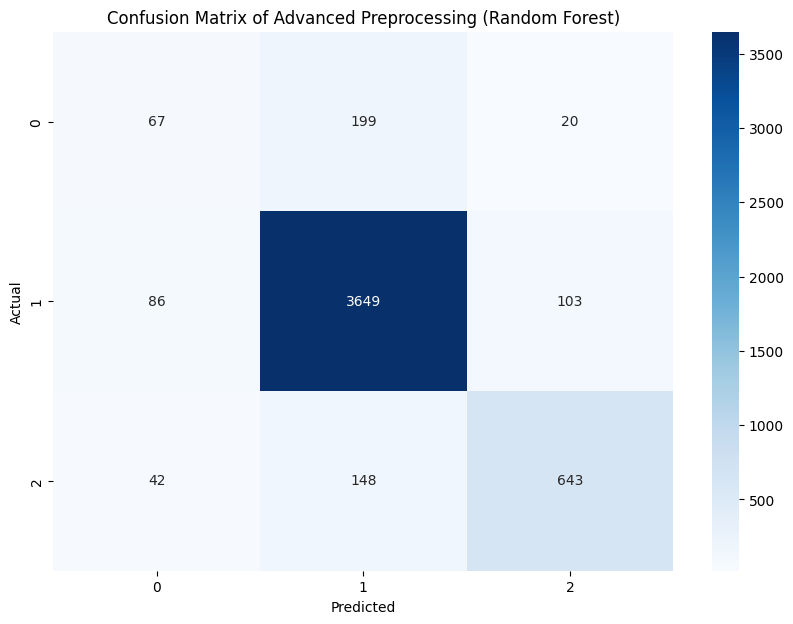

In [61]:
# Generate confusion matrix
cm_B_LR = confusion_matrix(yB_test, yB_pred_LR)
cm_A_LR = confusion_matrix(yA_test, yA_pred_LR)

cm_B_RF = confusion_matrix(yB_test, yB_pred_RF)
cm_A_RF = confusion_matrix(yA_test, yA_pred_RF)

# Plot confusion matrix and save the figure
plt.figure(figsize=(10, 7))
sns.heatmap(cm_B_LR, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Simple Preprocessing (Logistic Regression)')
plt.savefig('results/confusion_matrix_simple_LR.png')
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(cm_A_LR, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Advanced Preprocessing (Logistic Regression)')
plt.savefig('results/confusion_matrix_advanced_LR.png')
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(cm_B_RF, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Simple Preprocessing (Random Forest)')
plt.savefig('results/confusion_matrix_simple_RF.png')
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(cm_A_RF, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Advanced Preprocessing (Random Forest)')
plt.savefig('results/confusion_matrix_advanced_RF.png')
plt.show()
